# Overlaying in vitro cells on atlas

# Set up workspace:

In [1]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib.pyplot import rc_context
import seaborn as sns

In [2]:
#show current directory 
os.getcwd()
os.chdir('/scratch/user/s4436039/scdata/Python_Integration_Sep')
os.getcwd()

'/scratch/user/s4436039/scdata/Python_Integration_Sep'

Print software versions:

In [4]:
sc.logging.print_header()

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.14.0 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.12


In [5]:
ddl.logging.print_header()

dandelion==0.3.8 pandas==2.2.2 numpy==1.26.4 matplotlib==3.9.2 networkx==3.3 scipy==1.14.0


In [3]:
# read in data
data = sc.read_h5ad('NRclean_clustered2.h5ad')

In [6]:
#show current directory 
os.getcwd()
os.chdir('/scratch/user/s4436039/sc_AllDC')
os.getcwd()

'/scratch/user/s4436039/sc_AllDC'

In [9]:
data

AnnData object with n_obs × n_vars = 498023 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotati

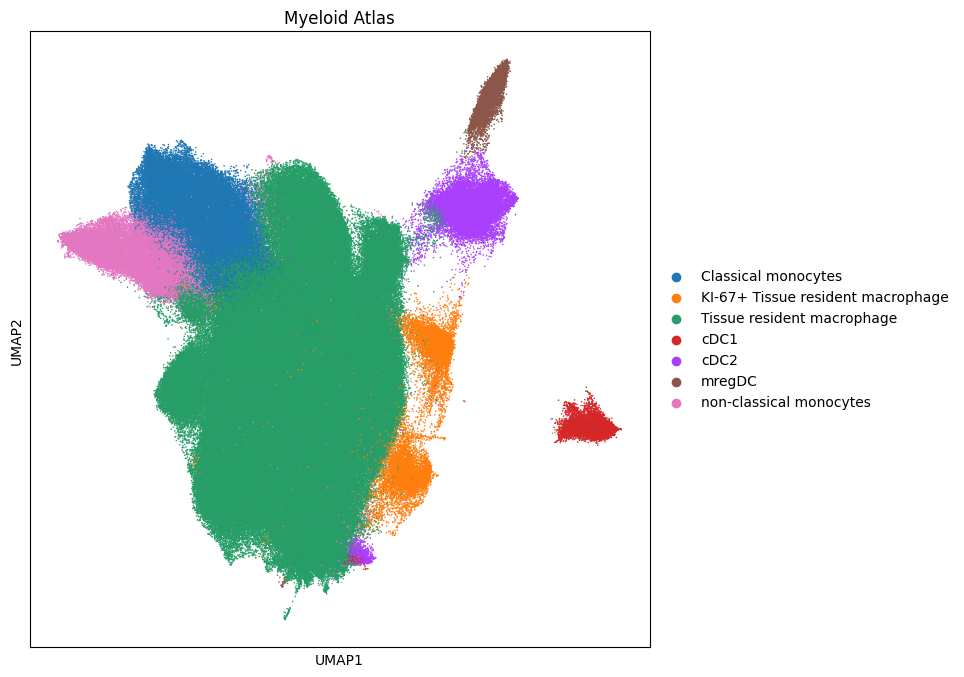

In [10]:
with plt.rc_context({"figure.figsize": (8, 8)}):
    sc.pl.umap(data, color="NR_annotations_simple", size=5, title="Myeloid Atlas")

# overlay in vitro DEGs 

In [7]:
#define gene sets 
AllDC_DC2_v1 = ['MRC1','CLEC10A','HLA-DRA','CST3','IGSF6','FTL','CTSS','PKIB','TYROBP','HLA-DPA1','HLA-DMA','HLA-DQB1','HLA-DPB1','HLA-DRB1','HLA-DQA1','HLA-DMB','LGALS3','IL1R2','LGALS2','ATP1B1','CLEC4A','FCER1G','DOK2','FCGR2B','CTSH','CSF1R','IL1R1','S100A6','NCF2','CD1E','IFITM3','CD74','TIMP1','SGK1','CD1C','CSTB','GPAT3','PILRA','IFNGR1','IL18','LPAR6','FGL2','FTH1','PFDN5','RNF130','S100A11','CD302','FCGRT','ANXA5','IFI30']
AllDC_DC2_v2 = ['FCER1G','ALOX5AP','S100A4','TCF4','DAB2','LST1','GNG11','CX3CR1','S100A6','CD74','C12orf75','S100A10','CST3','TYROBP','SERPINF1','HLA-DRA','SLC20A1','HLA-DQB1','HLA-DPA1','ANXA2','HLA-DRB1','HLA-DMA','JAML','IFI30','SAMHD1','FTL','CD4','CD2','HLA-DPB1','FGL2','CCDC50','MS4A6A','SIGLEC6','CALM1','HLA-DQA1','GAS6','TGFBI','LTB','PKIB','HLA-DMB','S100A11','RGS2','ARHGAP18','SH3BGRL3','ITM2C','NIBAN1','IL3RA','PTPRE','CLEC10A','MYL12A']
AllDC_DC1 = ['CPVL','C1orf54','CCND1','CLEC9A','CADM1','PPT1','RGCC','SHTN1','DNASE1L3','CD1A','RAB7B','CPNE3','C15orf48','CD1C','CLEC7A','CAMK2D','BATF3','FGL2','PSMB9','IRF8','EGLN3','HLA-B','WDFY4','BASP1','SPATS2L','ENPP1','S100A10','NDRG2','HLA-C','RNASE6','RGS10','OAT','PTMS','CD74','TAP1','SLAMF8','ASAP1','SNX3','FNBP1','HLA-DOB','CBL','DSE','CHPT1','PLEKHM3','NAAA','AHNAK','SNX22','LMNA','ELOVL5','DIPK2A']
AllDC_mregDC = ['BIRC3','LAMP3','REL','SYNGR2','CCR7','FSCN1','ETV3','RAB9A','GPX4','RASSF4','ID2','GPR157','SAMSN1','CCL22','NRP2','MARCKS','TMSB10','TNFRSF11A','CSF2RA','IL7R','LY75','RPS27L','TRIB1','PNRC1','POGLUT1','BTG1','GSTP1','IL4I1','MAP3K14','MARCKSL1','TBC1D4','NABP1','TYMP','PTGIR','DAPP1','ATOX1','AC008105.3','IRF4','GSN','ARHGAP10','NFKB1','NUB1','TXN','CTSH','B2M','HMGN3','IFI30','FYTTD1','RFTN1','ATF5']
AllDC_monocytes = ['CSF3R','SRGN','MNDA','LYST','AL034397.3','MT-ND1','MPO','S100A9','SORL1','EMB','BPI','NEAT1','IRAK3','CLEC12A','RFLNB','SERPINB1','S100A8','AZU1','ACTN1','RAB27A','MT-ND2','PYGL','GCA','TKT','PRAM1','SLC40A1','MS4A3','LYZ','DMXL2','SPN','S100P','RNASE2','TENT5A','FCN1','FNDC3B','ELANE','PRTN3','MT-ND4','ATP8B4','SERPINB10','RETN','MAPK14','ABHD5','IRS2','CSTA','LAMP2','CITED2','MYB','STXBP5','CD24']
OP9_DC2 = ['MOB3B','CD1E','B3GNT5','DOK2','CYBRD1','SERINC5','ALOX5AP','CD34','PTGS1','SERPINA1','SLC20A1','CEBPA','TIMP1','DPYD','PLD4','FCER2','ARRDC4','ETS2','SIRPA','CYBB','PILRA','PYGL','PALLD','IL1R2','GPR183','GFRA2','PTAFR','HBEGF','CFP','ATP6V1B2','IL21R','CDKN1A','RCAN1','HSPG2','CSF1R','CASP1','RGL1','NAB2','CEMIP2','TBXAS1','SLC7A5','KCTD5','MTSS1','CTSA','MAOA','IL1R1','VEGFA','BLNK','PLA2G15','CTSC','LYST','PRXL2A','C6orf223','TLR4','HSD17B4','PPP1R14A','SPINT2','LILRB3','CACNA1D','NCF2','TMCC2','LPXN','TCF4','SCPEP1','CYSLTR1','LRMDA','MRAS','SORT1','CLEC4G','PKD2','MOB3C','RENBP','MS4A4A','PLEKHG3','GOLGA8O','NAIP','FABP3','PTGIR','FAM89A','RNF130','NRP1','LAMP1','LINC01094','MKNK1','P2RY11','CTNS','ZEB2','CREM','CD1B','TMEM104','CLCN5','PIP4K2A','CES1','CD109','PDCD1LG2','SIGLEC9','TMEM86A','SLC5A3','TNFRSF1A','ENPP2']


In [8]:
# Define dictionary of gene sets
gene_sets = {
    "AllDC_DC2_v1": AllDC_DC2_v1,
    "AllDC_DC2_v2": AllDC_DC2_v2,
    "AllDC_DC1": AllDC_DC1,
    "AllDC_mregDC": AllDC_mregDC,
    "AllDC_monocytes": AllDC_monocytes,
    "OP9_DC2": OP9_DC2
}

In [9]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets.items():
    sc.tl.score_genes(data, genes, score_name=name)

In [10]:
colour_vars = ["AllDC_DC2_v1","AllDC_DC2_v2","AllDC_DC1","AllDC_mregDC","AllDC_monocytes","OP9_DC2","NR_annotations_simple"]

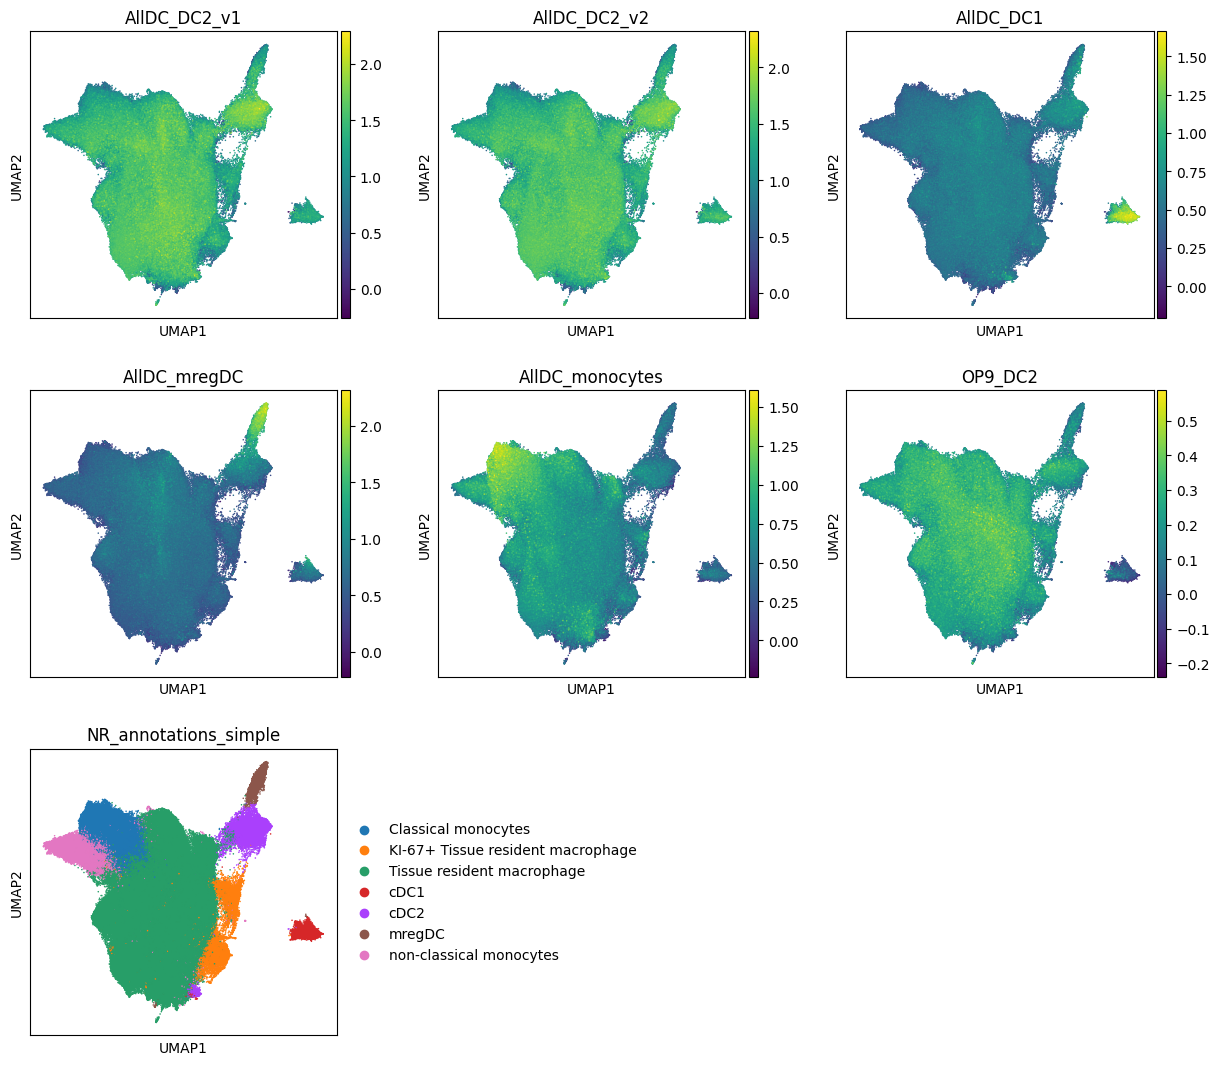

In [11]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data, color=colour_vars, ncols=3, size=5)

/scratch/temp/12356893/ipykernel_2362292/3784443177.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


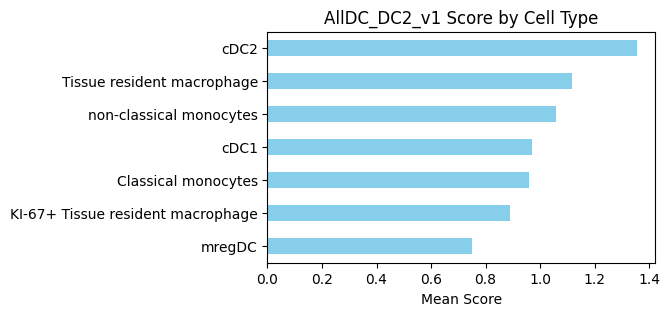

/scratch/temp/12356893/ipykernel_2362292/3784443177.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


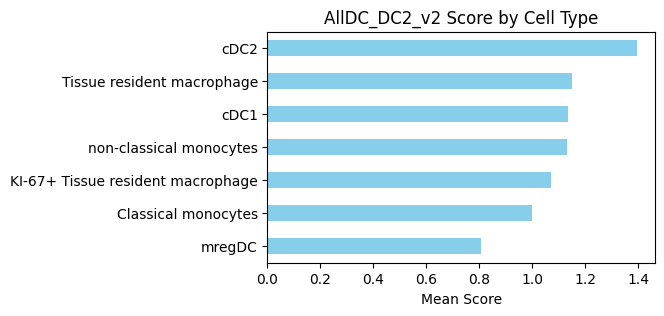

/scratch/temp/12356893/ipykernel_2362292/3784443177.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


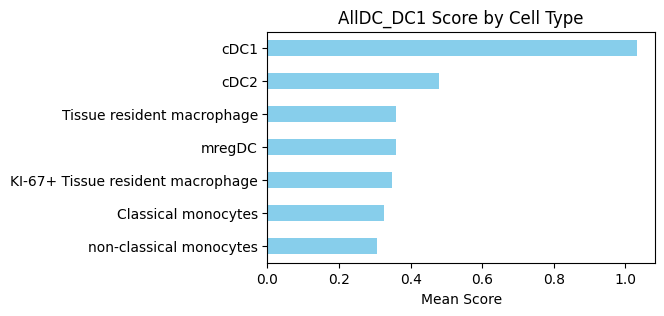

/scratch/temp/12356893/ipykernel_2362292/3784443177.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


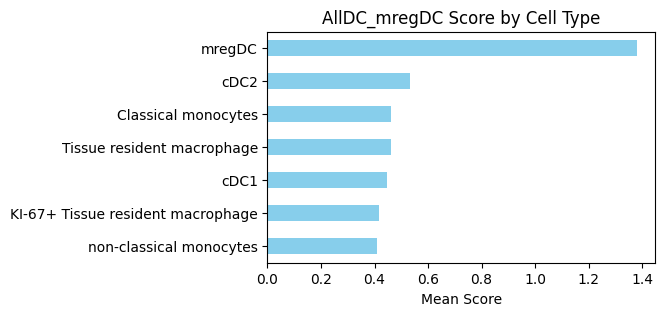

/scratch/temp/12356893/ipykernel_2362292/3784443177.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


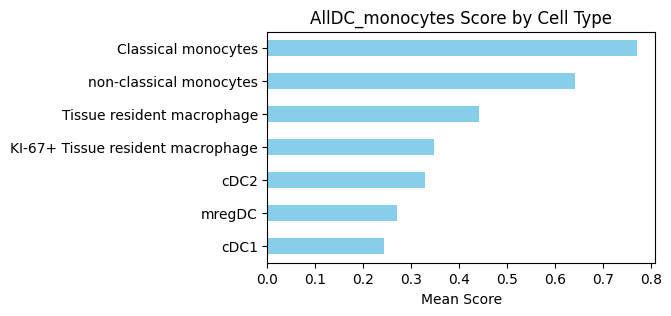

/scratch/temp/12356893/ipykernel_2362292/3784443177.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


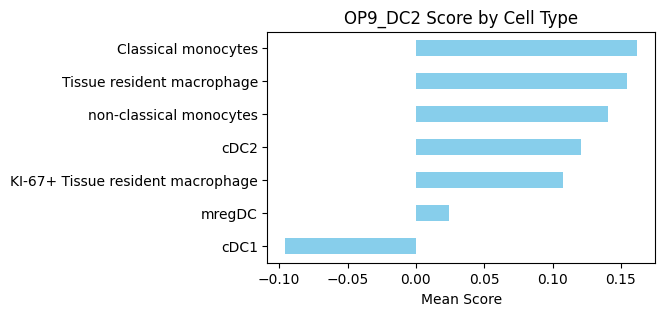

In [12]:
cluster_col = "NR_annotations_simple"

# Loop over each gene set to create a bar plot
for gene_set in gene_sets.keys():
    # Calculate the mean score for each cluster
    mean_scores = data.obs.groupby(cluster_col)[gene_set].mean()
    
    # Plot the mean scores as a horizontal bar plot
    plt.figure(figsize=(5, 3))
    mean_scores.sort_values().plot(kind='barh', color="skyblue")
    plt.xlabel("Mean Score")
    plt.title(f"{gene_set} Score by Cell Type")
    plt.ylabel("")
    plt.show()